1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [134]:
# Importando Librerias de regresion lineal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
conjuntoDatos = pd.read_csv('./Dataset Red Wine Quality/winequality-red.csv')
conjuntoDatos.head(5)

,acidez_fija,acidez_volatil,citrico,azucar,cloruros,dioxido_azufre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [135]:
conjuntoDatos.describe()

,acidez_fija,acidez_volatil,citrico,azucar,cloruros,dioxido_azufre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [136]:
conjuntoDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidez_fija           1599 non-null   float64
 1   acidez_volatil        1599 non-null   float64
 2   citrico               1599 non-null   float64
 3   azucar                1599 non-null   float64
 4   cloruros              1599 non-null   float64
 5   dioxido_azufre        1599 non-null   float64
 6   dioxido_azufre_total  1599 non-null   float64
 7   densidad              1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulfatos              1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  calidad               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

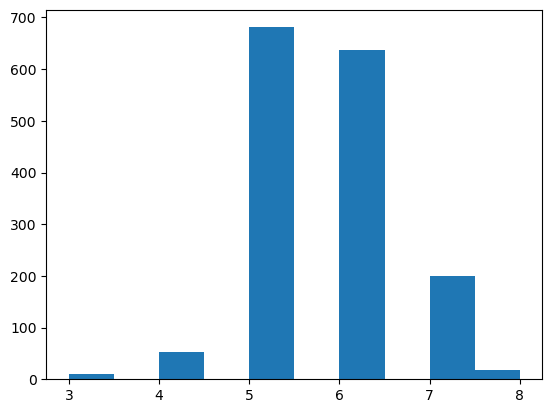

In [137]:
mplot.hist(conjuntoDatos.calidad)

In [138]:
var_predictoras = ["citrico","alcohol", "acidez_volatil"]
var_objetivo = ['calidad']

In [139]:
predictoras = conjuntoDatos[var_predictoras]
objetivo = conjuntoDatos[var_objetivo]


In [140]:
predictoras

,citrico,alcohol,acidez_volatil
0,0.00,9.4,0.700
1,0.00,9.8,0.880
2,0.04,9.8,0.760
3,0.56,9.8,0.280
4,0.00,9.4,0.700
...,...,...,...
1594,0.08,10.5,0.600
1595,0.10,11.2,0.550
1596,0.13,11.0,0.510
1597,0.12,10.2,0.645


In [141]:
objetivo

,calidad
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [142]:
correlacion = predictoras.corr()
correlacion

,citrico,alcohol,acidez_volatil
citrico,1.000000,0.109903,-0.552496
alcohol,0.109903,1.000000,-0.202288
acidez_volatil,-0.552496,-0.202288,1.000000


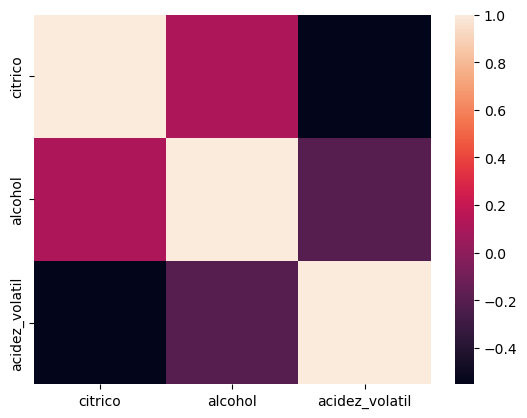

In [143]:
sns.heatmap(correlacion)
mplot.show()

In [144]:
X_train, X_test, y_train, y_test = train_test_split(predictoras, objetivo, test_size = 0.25, random_state = 13)

In [145]:
arbol = DecisionTreeClassifier(max_depth = 3)
arbolDecision = arbol.fit(X_train, y_train)

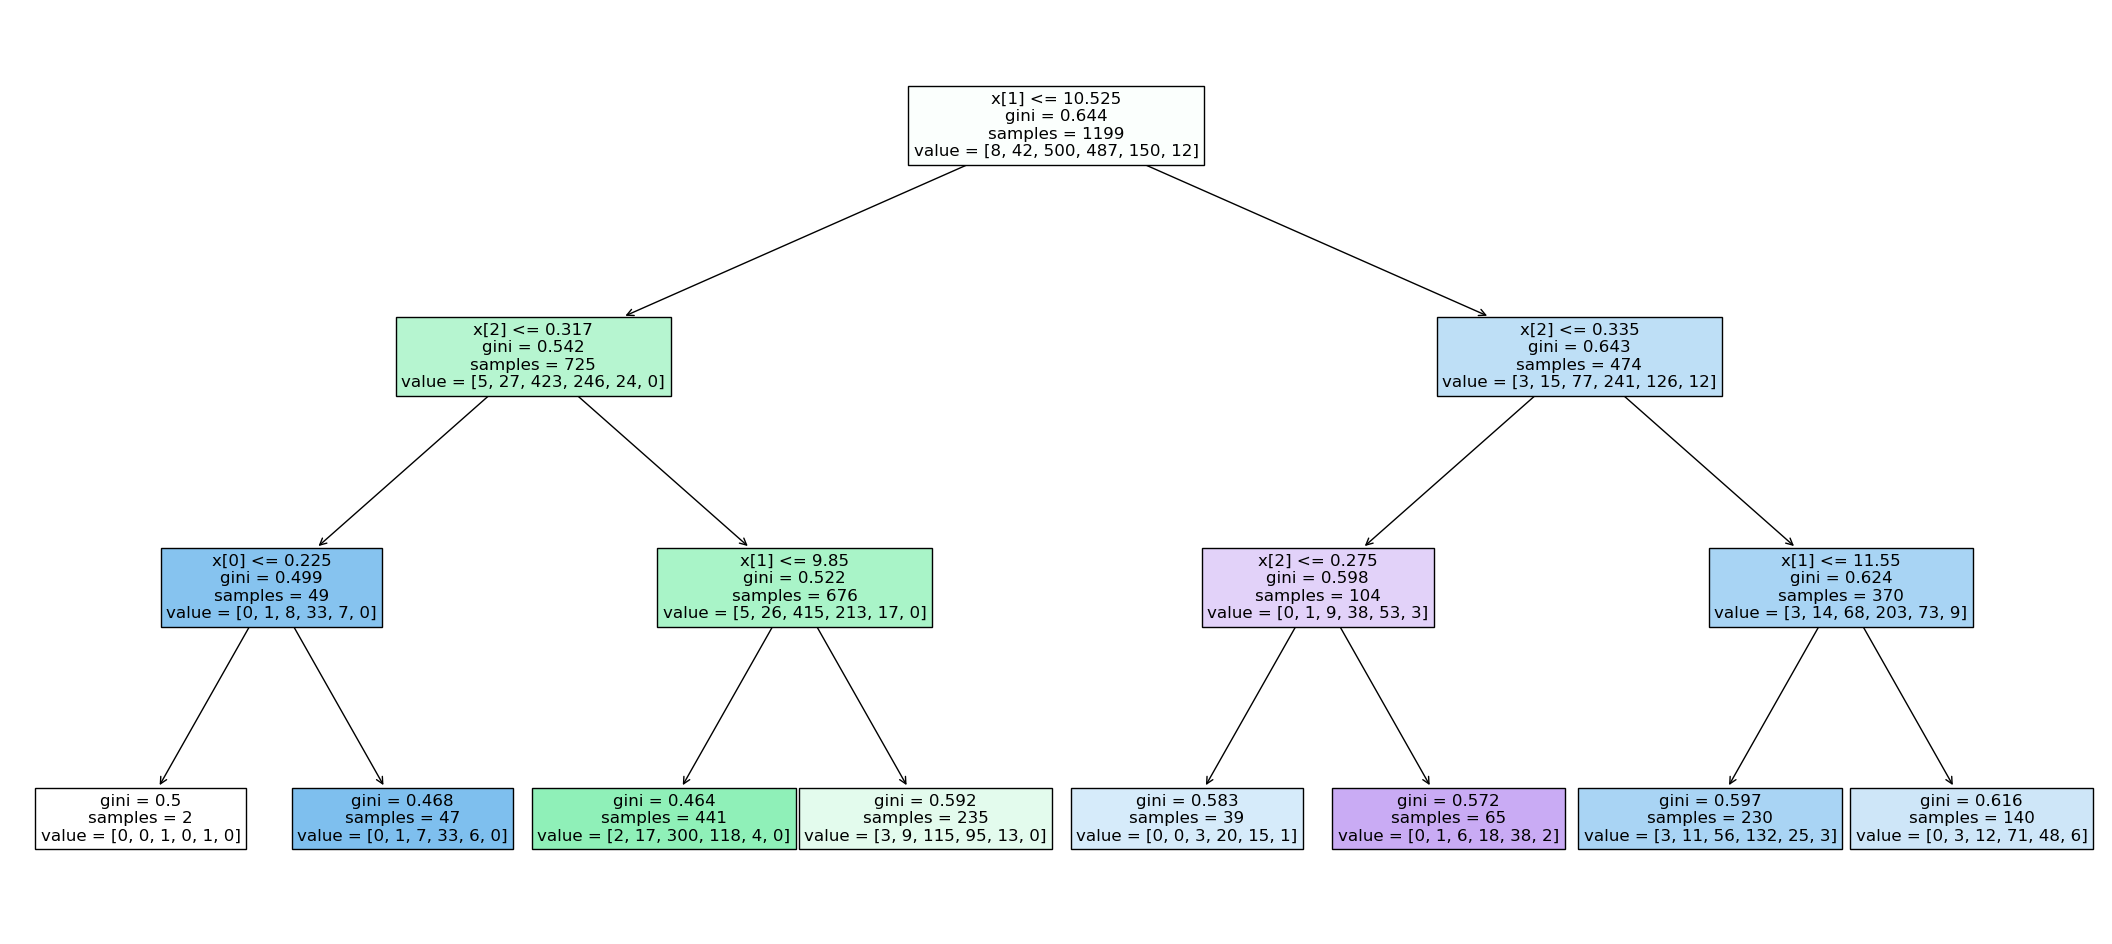

In [152]:
mplot.figure(figsize = (27, 12))
plot_tree(arbolDecision, filled = True, fontsize = 12);

In [147]:
predicciones = arbolDecision.predict(X_test)
predicciones

array([6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5,
       6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 7, 7,
       5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6,
       6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 7, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5,
       7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6,
       5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 5, 5, 6, 5, 7,
       5, 5, 6, 5, 7, 5, 5, 5, 6, 7, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 7, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 7, 5,
       5, 7, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5,

In [148]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,5,6,7
Actual,,,
3,2,0,0
4,7,4,0
5,145,33,3
6,75,70,6
7,8,32,9
8,1,5,0


In [149]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.56

<Axes: xlabel='alcohol', ylabel='Count'>

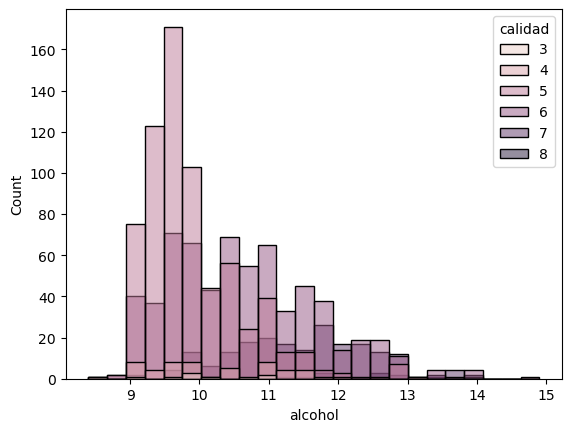

In [156]:
sns.histplot(x = conjuntoDatos.alcohol, hue = conjuntoDatos.calidad, color = "red")